Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Figure 12.18

Illustration of sparse regression and the lasso for a simple example with just two features, where the response is a linear function of only one of the features corrupted by additive noise\
Topics and relevant videos: [Sparse regression, sparsity, the lasso, regularization](https://www.youtube.com/watch?v=GyEYOAPvOks)

Author: Carlos Fernandez-Granda

In [27]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy.random import default_rng
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
font_size = 15
font_size_ticks = 15
np.set_printoptions(precision=3)

xmin = -3
xmax = 3
ymin = -3
ymax = 3
beta_x_min = -0.05
beta_x_max = 1.4
beta_y_min = -0.4
beta_y_max = 0.4
beta_x_min_landscape = -0.05
beta_x_max_landscape = 1.8
beta_y_min_landscape = -0.7
beta_y_max_landscape = 0.9
x_grid = np.linspace(xmin, xmax, 200)
sigma = 0.2
reps = 100
msize = 50

In [29]:
rng = default_rng(2023)
n = 8

rho_sq = np.sqrt(0)
common_component = rho_sq * rng.standard_normal(n)
x_1_raw = common_component + np.sqrt(1-rho_sq**2) * rng.standard_normal(n)
x_1 = x_1_raw - np.mean(x_1_raw)
x_2_raw = common_component + np.sqrt(1-rho_sq**2) * rng.standard_normal(n)
x_2 = x_2_raw - np.mean(x_2_raw)

true_beta_1 = 1
true_beta_2 = 0
true_alpha = 0

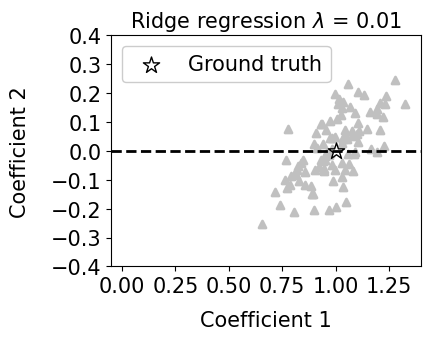

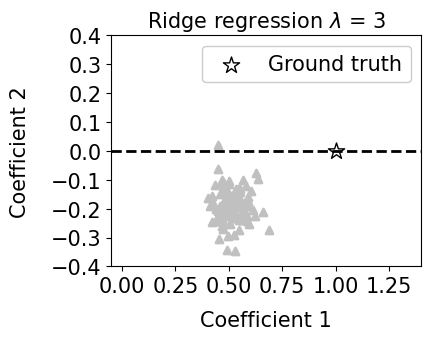

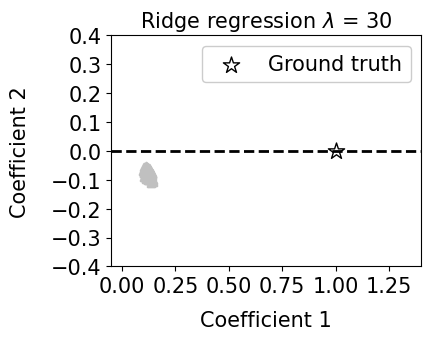

In [22]:
# Ridge regression does not produce sparse coefficient estimates
rng = default_rng(2023)
n = 8
lambdas = [0.01,3,30]

betas = np.zeros((reps,2))

for ind_lambda,lambda_val in enumerate(lambdas):
    ridge_lambda = Ridge(alpha=lambda_val,fit_intercept=False)
        
    for ind in range(reps):

        z = sigma * rng.standard_normal(n)
        y = true_beta_1 * x_1 + true_beta_2 * x_2 + true_alpha + z

        X = np.array([x_1,x_2]).T

        linear_model = ridge_lambda.fit(X, y)

        betas[ind,:] = linear_model.coef_

    plt.figure(figsize=(4,3))
    plt.scatter(betas[:,0],betas[:,1],s=msize/2,color="silver",edgecolor='silver',marker="^",lw=2, rasterized=True)
    plt.hlines(0,beta_x_min,beta_x_max,lw=2,ls="dashed",color="black")
    plt.scatter(true_beta_1,true_beta_2,s=3*msize,color="white",edgecolor='black',lw=1,marker="*", label="Ground truth")
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.ylim([beta_y_min,beta_y_max])
    plt.xlim([beta_x_min,beta_x_max])
    plt.xlabel('Coefficient 1',fontsize=font_size,labelpad = 10)
    plt.ylabel('Coefficient 2',fontsize=font_size,labelpad = 15)
    plt.legend(fontsize=font_size,framealpha=1)
    plt.title(r"Ridge regression $\lambda$ = " + str(lambda_val),fontsize=font_size);

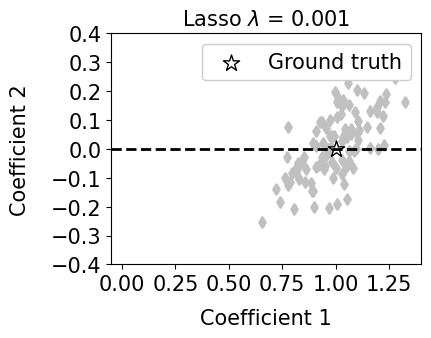

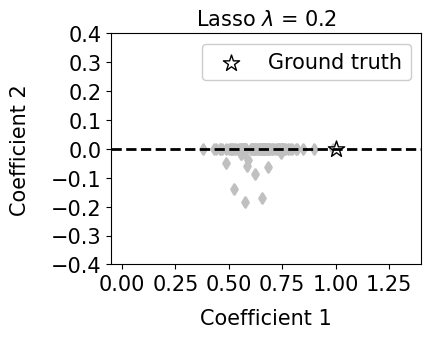

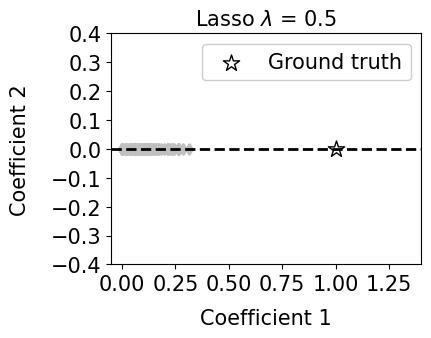

In [30]:
# The lasso does induce sparse coefficient estimates
rng = default_rng(2023)
n = 8
lambdas = np.array([0.001,0.2,0.5])#*2*n

betas = np.zeros((reps,2))

for ind_lambda,lambda_val in enumerate(lambdas):
    lasso_lambda = Lasso(alpha=lambda_val,fit_intercept=False)
        
    for ind in range(reps):

        z = sigma * rng.standard_normal(n)
        y = true_beta_1 * x_1 + true_beta_2 * x_2 + true_alpha + z

        X = np.array([x_1,x_2]).T

        linear_model = lasso_lambda.fit(X, y)

        betas[ind,:] = linear_model.coef_

    plt.figure(figsize=(4,3))
    plt.scatter(betas[:,0],betas[:,1],s=msize/2,color="silver",edgecolor='silver',marker="d",lw=2, rasterized=True)
    plt.hlines(0,beta_x_min,beta_x_max,lw=2,ls="dashed",color="black")
    plt.scatter(true_beta_1,true_beta_2,s=3*msize,color="white",edgecolor='black',lw=1,marker="*", label="Ground truth")
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.ylim([beta_y_min,beta_y_max])
    plt.xlim([beta_x_min,beta_x_max])
    plt.xlabel('Coefficient 1',fontsize=font_size,labelpad = 10)
    plt.ylabel('Coefficient 2',fontsize=font_size,labelpad = 15)
    plt.legend(fontsize=font_size,framealpha=1,loc="upper right")
    plt.title(r"Lasso $\lambda$ = " + str(lambda_val),fontsize=font_size);